<a href="https://colab.research.google.com/github/IsaacFigNewton/CSC-480/blob/main/CSC480_Assignment3_Rudnick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Config

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten
)

In [12]:
batch_size = 50

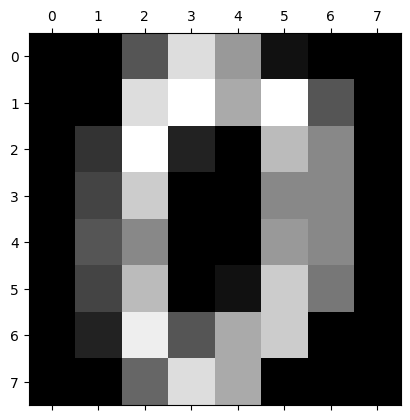

In [38]:
# Load the dataset and display the first image to make sure it loaded correctly
dataset = sklearn.datasets.load_digits()
plt.matshow(dataset.images[0], cmap="gray")
plt.show()

# Preprocessing
- Split the dataset into training, validation, and test sets
- Normalize or scale the input features as needed (e.g., scale pixel values to [0,1]).

In [45]:
# Split dataset into train/test, validation sets (90-10 split)
X_train_validate, X_test, y_train_validate, y_test = train_test_split(
    dataset.data,
    dataset.target,
    test_size=0.1,
    random_state=69
)

# Split dataset into train, test sets (80-20 split)
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_validate,
    y_train_validate,
    test_size=0.2,
    random_state=69
)

# Standardize the train and test sets according to best practices: https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

# reshape the input sets for 2D image format
X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)
X_validate = X_validate.reshape(X_validate.shape[0], 8, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 8, 8, 1)


# One-hot encode the sets
y_train = to_categorical(y_train)
y_validate = to_categorical(y_validate)
y_test = to_categorical(y_test)

print("Train set:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print("Validation set:")
print(f"X_validate shape: {X_validate.shape}")
print(f"y_validate shape: {y_validate.shape}")
print()
print("Test set:")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Train set:
X_train shape: (1293, 8, 8, 1)
y_train shape: (1293, 10)

Validation set:
X_validate shape: (324, 8, 8, 1)
y_validate shape: (324, 10)

Test set:
X_test shape: (180, 8, 8, 1)
y_test shape: (180, 10)


# Neural Network Implementation
- Implement a neural network using PyTorch or TensorFlow.
- Include at least one hidden layer.
- Choose appropriate activation functions (e.g., ReLU, sigmoid).
- Use a suitable loss function
- Select an optimizer and tune hyperparameters (e.g., learning rate).

In [46]:
# Architecture: a CNN with the following pipeline:
# - convolution layer with a 3x3 kernel, no padding, 4 filters, to get a 6x6x4 output
# - max pooling layer with a 3x3 kernel, no padding to get an 4x4x4 output
# - convolution layer with a 2x2 kernel, no padding, 8 filters, to get a 3x3x8 output
# - max pooling layer with a 2x2 kernel, no padding to get an 2x2x8 output
# - flatten the 2x2x8 output into a 32x1 vector
# - 32x10 fully connected layer
# softmax activation function on output layer
# Also, cross-entropy loss f'n, ReLU f'n for all hidden layers

model = tf.keras.models.Sequential([
  Input(shape=(8, 8, 1)),
  Conv2D(
      filters=4,
      kernel_size=(3, 3),
      strides=(1, 1),
      padding="same",
      activation="relu"
  ),
  MaxPooling2D(
      pool_size=(3, 3),
      padding="same"
  ),
  Conv2D(
      filters=4,
      kernel_size=(2, 2),
      strides=(1, 1),
      padding="same",
      activation="relu"
  ),
  MaxPooling2D(
      pool_size=(2, 2),
      padding="same"
  ),
  Flatten(),
  Dense(
      units=32,
      activation="relu"
  ),
  Dense(
      units=10,
      activation="softmax"
  )
])

# Training and Validation
- Train the model on the training set for a reasonable number of epochs.
- Monitor performance on the validation set to prevent overfitting (e.g., early stopping or learning rate scheduling).
- Plot training and validation loss/accuracy over epochs.

In [48]:
# test model
model(X_train[:1]).numpy()

array([[0.09512168, 0.28281793, 0.13678396, 0.11620615, 0.07927565,
        0.07149648, 0.06896149, 0.06823062, 0.06436016, 0.0167459 ]],
      dtype=float32)

## Training

## Validation

# Evaluation
- Report the accuracy on the test set.
- Provide a confusion matrix to analyze model performance across classes.